In [ ]:
# /// script
# requires-python = ">=3.11"
# dependencies = [
#     "annsel",
#     "numpy",
#     "scanpy",
# ]
# ///

# All of Annsel

This notebook tells you just about everything you need to use `annsel`. It's a good starting point to get a feel for the package.

:::{note}
:class: dropdown

You should be familiar with [`AnnData` ](https://anndata.readthedocs.io/en/latest/) beforehand.
:::

## Set up Data

In [2]:
import annsel as an
import numpy as np
import scanpy as sc

We will load a Leukemic bone marrow cytometry dataset :cite:p:`Triana2021` You can view the dataset on [CellxGene](https://cellxgene.cziscience.com/e/b3a5a10f-b1cb-4e8e-abce-bf345448625b.cxg/).

In [3]:
adata = an.datasets.leukemic_bone_marrow_dataset()

View the contents of the `AnnData` object.


In [4]:
display(adata)

AnnData object with n_obs × n_vars = 31586 × 458
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X_umapni

Importing `annsel` will automatically register the accessor and add the `an` attribute to the `AnnData` object's namespace.

You can access the methods of the accessor using the `an` attribute on an `AnnData` object.

```python

anndata.AnnData.an.<method_name>
```

## Filter


We can filter the `AnnData` object using the `filter` method. Filtering can be applied to the following attributes of an `AnnData` object:

- `obs`
- `var`
- `var_names`
- `obs_names`
- `X` and its layers
- `obsm` and `varm` matrices as a key-value pair containing the attribute's key name and the predicate to filter on.

Let's filter the `AnnData` object by the Cell Type stored in `obs["Cell_label"]`.

In [5]:
adata.an.filter(obs=an.col(["Cell_label"]) == "CD8+CD103+ tissue resident memory T cells")

View of AnnData object with n_obs × n_vars = 890 × 458
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X_

:::{note}
This is equivalent to

```python
adata[adata.obs["Cell_label"] == "CD8+CD103+ tissue resident memory T cells", :]
```
:::

You can also apply other expressions to `an.col` callable, for example `is_in` allows you to filter by a list of values. Under the hood, `annsel` uses [Narwhals](https://narwhals-dev.github.io/narwhals/) to apply these expressions. A full list of expressions which can be applied to a column can be found [here](https://narwhals-dev.github.io/narwhals/api-reference/expr/).

In [6]:
adata.an.filter(obs=an.col(["Cell_label"]).is_in(["Classical Monocytes", "CD8+CD103+ tissue resident memory T cells"]))

View of AnnData object with n_obs × n_vars = 10825 × 458
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', '

:::{note}
This is equivalent to

```python
adata[adata.obs["Cell_label"].isin(["Classical Monocytes", "CD8+CD103+ tissue resident memory T cells"]), :]
```
:::

We can also combine multiple Predicates using the `&` and `|` operators.

In [7]:
adata.an.filter(
    obs=(
        an.col(["Cell_label"]).is_in(["Classical Monocytes", "CD8+CD103+ tissue resident memory T cells"]),
        an.col(["sex"]) == "male",
    ),
    var=an.col(["vst.mean"]) >= 3,
)

View of AnnData object with n_obs × n_vars = 7727 × 67
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X_

In [8]:
adata.an.filter(
    obs=(an.col(["Cell_label"]).is_in(["Classical Monocytes", "CD8+CD103+ tissue resident memory T cells"]))
    & (an.col(["sex"]) == "male")
)

View of AnnData object with n_obs × n_vars = 7727 × 458
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X

:::{note}
This is equivalent to

```python
adata[
    (adata.obs["Cell_label"] == "CD8+CD103+ tissue resident memory T cells")
    & (adata.obs["sex"] == "male")
]
```
:::

Or if you pass a tuple of Predicates, it will apply the `&` operator between them automatically.

In [9]:
adata.an.filter(
    obs=(
        an.col(["Cell_label"]).is_in(["Classical Monocytes", "CD8+CD103+ tissue resident memory T cells"]),
        an.col(["sex"]) == "male",
    )
)

View of AnnData object with n_obs × n_vars = 7727 × 458
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X

:::{note}
This is equivalent to

```python
adata[
    (adata.obs["Cell_label"].isin(["Classical Monocytes", "CD8+CD103+ tissue resident memory T cells"]))
    & (adata.obs["sex"] == "male")
]
```
:::

The `|` operator is applied between the Predicates as well. Here we will select all the cells that are either Classical Monocytes or CD8+CD103+ tissue resident memory T cells, or are from male samples irrespective of the cell type.

In [10]:
adata.an.filter(
    obs=(
        an.col(["Cell_label"]).is_in(["Classical Monocytes", "CD8+CD103+ tissue resident memory T cells"])
        | (an.col(["sex"]) == "male")
    )
)

View of AnnData object with n_obs × n_vars = 18868 × 458
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', '

:::{note}
This is equivalent to

```python
adata[
    (adata.obs["Cell_label"].isin(["Classical Monocytes", "CD8+CD103+ tissue resident memory T cells"]))
    | (adata.obs["sex"] == "male")
]
```
:::

We can also filter the `AnnData` object by the `var` column. Here we will filter the `AnnData` object to only include the genes with `vst.mean` greater than or equal to 3.

In [11]:
adata.an.filter(var=an.col(["vst.mean"]) >= 3)

View of AnnData object with n_obs × n_vars = 31586 × 67
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X

:::{note}
This is equivalent to

```python
adata[adata.var["vst.mean"] >= 3]
```
:::

Filtering can also be applied to the `X` matrix. Here we will filter the `AnnData` object to only include the cells with `ENSG00000205336` gene expression greater than 1. If you want to filter by a layer, you can pass the layer name to the `layer` argument. and the operation will be applied to the `var_name` of that layer.

This dataset does not include a layer, so let's create our own layer. We will arcsinh transform the `X` matrix and store it in a new layer called `arcsinh`.

In [12]:
adata.layers["arcsinh"] = np.arcsinh(adata.X)

In [13]:
adata.an.filter(
    x=an.col(["ENSG00000205336"]) > 1,
    layer="arcsinh",
)

View of AnnData object with n_obs × n_vars = 6709 × 458
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X

This can all be combined together as well

In [14]:
adata.an.filter(
    obs=(
        an.col(["Cell_label"]).is_in(["Classical Monocytes", "CD8+CD103+ tissue resident memory T cells"]),
        an.col(["sex"]) == "male",
    ),
    var=an.col(["vst.mean"]) >= 3,
)

View of AnnData object with n_obs × n_vars = 7727 × 67
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X_

:::{note}
This is equivalent to

```python
adata[
    (adata.obs["Cell_label"].isin(["Classical Monocytes", "CD8+CD103+ tissue resident memory T cells"]))
    & (adata.obs["sex"] == "male"),
    (adata.var["vst.mean"] >= 3),
]
```
:::

Filtering can also be applied to `var_names` and `obs_names` using the `an.var_names` and `an.obs_names` predicates respectively. These are special predicates which can only be applied to `var_names` and `obs_names` of the `AnnData` object.

`an.obs_names = an.col("obs_names")` and `an.var_names = an.col("var_names")`. They are simply special instances of `an.col`.

Here, arbitrarily, we will filter the AnnData object to only include the cells with `obs_names` starting with `645` and the genes with `var_names` starting with `ENSG0000018`.

In [15]:
adata.an.filter(obs_names=an.obs_names.str.starts_with("645"), var_names=an.var_names.str.starts_with("ENSG0000018"))

View of AnnData object with n_obs × n_vars = 37 × 30
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X_um

## Select


We can also apply the `select` method to the `AnnData` object. This is similar to the `filter` method, but it will only keep the rows and columns that match the Predicates. It can be applied to the `obs`, `var`, and `X`.

Here we will select the `Cell_label` and `sex` columns from the `obs` table, the `feature_name` column from the `var` table and the `ENSG00000205336` gene from `X`. This will return a new `AnnData` object with only these columns in the `obs`, `var` and `X` tables.

In [16]:
adata.an.select(
    obs=an.col(["Cell_label", "sex"]),
    var=an.col(["feature_name"]),
    x=an.col(["ENSG00000205336"]),
)

View of AnnData object with n_obs × n_vars = 31586 × 1
    obs: 'Cell_label', 'sex'
    var: 'feature_name'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X_umapni'
    layers: 'arcsinh'

## Cross-Component Aggregation

The powerful `.with_obs()` method combines cell metadata with gene expression for aggregation.
This enables computing statistics that cross the obs/var/X boundaries.

In [17]:
import narwhals as nw

# Group by cell type and compute gene expression statistics
gene_subset = adata.var_names[:5].tolist()

stats = (
    adata.an.with_obs("Cell_label", var_names=gene_subset)
    .group_by("Cell_label")
    .agg(
        [
            nw.col(gene_subset[0]).mean().alias(f"{gene_subset[0]}_mean"),
            nw.col(gene_subset[1]).mean().alias(f"{gene_subset[1]}_mean"),
            nw.len().alias("n_cells"),
        ]
    )
)

In [18]:
print("Expression statistics by cell type:")
display(stats.to_native())

Expression statistics by cell type:


,Cell_label,ENSG00000184009_mean,ENSG00000205336_mean,n_cells
0,Lymphomyeloid prog,5.004765,1.418866,913
1,Conventional dendritic cell 1,5.110068,0.353331,156
2,Early promyelocytes,5.254223,1.132642,5106
3,Late promyelocytes,5.165099,0.216453,933
4,Classical Monocytes,3.217875,0.033613,9935
5,Conventional dendritic cell 2,4.500354,0.050428,877
6,Myelocytes,3.503205,0.054352,2736
7,HSCs & MPPs,5.163197,1.819482,1373
8,Non-classical monocytes,3.666991,0.056245,552
9,Plasmacytoid dendritic cell progenitors,5.520737,0.539469,16


## Pipe

We can also use pipe to apply functions on `AnnData` objects.

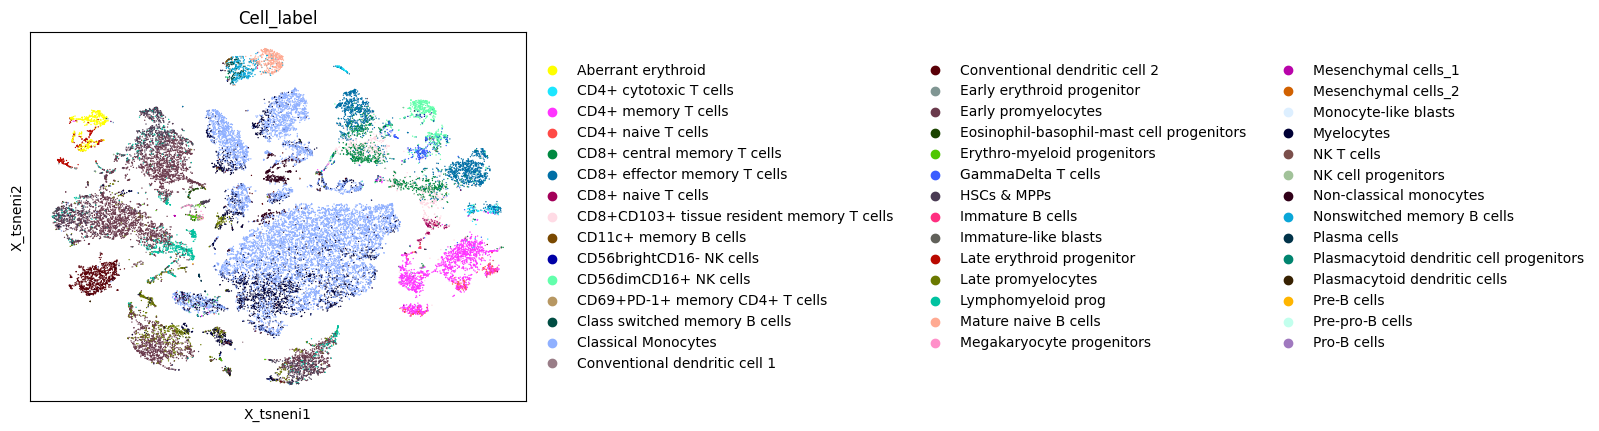

In [19]:
adata.an.pipe(sc.pl.embedding, basis="X_tsneni", color="Cell_label")

We can chain together multiple methods as well.

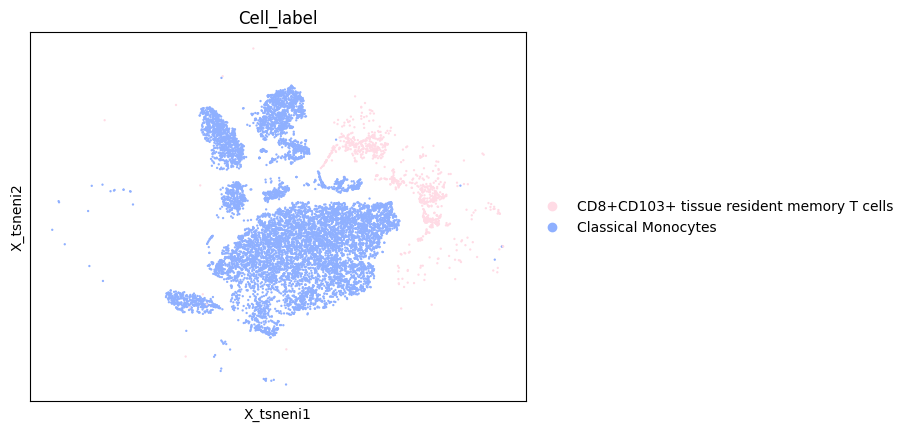

In [20]:
adata.an.select(obs=an.col(["Cell_label"])).an.filter(
    obs=an.col(["Cell_label"]).is_in(["Classical Monocytes", "CD8+CD103+ tissue resident memory T cells"])
).an.pipe(sc.pl.embedding, basis="X_tsneni", color="Cell_label")